# Import modules

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import random
from matplotlib import pyplot as plt
from math import exp
%matplotlib inline

# Initial parameters

In [2]:
# Population size
n = 1                             #useless here

# Default Time beginning
t=0

# Default trial duration
duration = 2.00 #second

# Default Time resolution
dt = 0.0001 #second 0.0001
 
# Thresholds (if from paper x200) 
Cortex_h   = 20.0             
Striatum_h = 2.0                 #depends on dopamine level, see below
Stn_h      = -17.0              
Gpi_h      = 20.0               
Thalamus_h = -47.0              

####################################### Weights ##########################################
CtxTha_G = 0.97                               
StnCtx_G = 2.0                             
StrCtx_G = 0.45                               #depends on dopamine level, see below
GpiStr_G = 12.0                              
GpiStn_G = 3.4                              
ThaGpi_G = 0.3                              


# Time constants 
CtxTha_tau = 0.005 #second
StnCtx_tau = 0.020 #second "5ms for all of the synapses except synapses from cortex to STN for which it's 20ms"
StrCtx_tau = 0.005 #second
GpiStr_tau = 0.005 #second
GpiStn_tau = 0.005 #second
ThaGpi_tau = 0.005 #second

# Delays:
CtxTha_D = 0.005
StnCtx_D = 0.005
StrCtx_D = 0.006
GpiStr_D = 0.010
GpiStn_D = 0.005
ThaGpi_D = 0.005

# inputs
Cortex_I   = 0
Striatum_I = 0
Stn_I      = 0
Gpi_I      = 0
Gpi_Ie     = 0
Gpi_Ii     = 0
Thalamus_I = 0

# Activities at time t:
CtxTha_m = 0
StnCtx_m = 0
StrCtx_m = 0
GpiStr_m = 0
GpiStn_m = 0
ThaGpi_m = 0

# Activities at dt
CtxTha_dm  = 0
StrCtx_dm  = 0
StnCtx_dm  = 0
GpiStr_dm  = 0
GpiStn_dm  = 0
ThaGpi_dm  = 0

# Connectivity J

CtxTha_J = 1
StrCtx_J = 1
StnCtx_J = 1
GpiStn_J = 1
GpiStr_J = 1
ThaGpi_J = 1

# Initialization of the random generator (reproductibility !)
np.random.seed(1)


# Noise Function

In [3]:
#White Gaussian Noise
def WGnoise():
    n = np.random.normal(0,1)
    return n

In [4]:
#Noise level (%)  = sigma from paper
Cortex_N   =   0.030 
Striatum_N =   0.005
Stn_N      =   0.02
Gpi_N      =   0.050
Thalamus_N =   0.05

def noise(Z, level):    #Z = size of the population
    Z = (np.random.uniform(-level/2,level/2,Z))*Z
    return Z

# Corrected Input function

In [5]:
#Function returning the corrected Input
def Ic(Input=0,threshold=0):
    
    if Input - threshold <= 0:
        return 0
    else:
        return (Input - threshold)

# Activity at time t-Delta (delay) function

In [6]:
# function to get the index "-delay/dt" in the list representing m(t-Delta) 
def mdelta(synapse_value,delay,t,dt):
    if t < delay:                # if the delay is the time is too small, we take m(t-delta)=0
        m = 0
    elif t >= delay:             # if the time is above or equal to the delay, we can find the m(t-delta)
        m = synapse_value[int(-delay/dt)]   # ???
    return m

# ==================== Simulation Core ====================

In [7]:
n_period = int(duration//dt)
time_value = [0]
for i in range(n_period - 1):
    time_value.append(time_value[-1] + dt)
print(time_value)    

CtxTha_value=np.zeros(n_period) 
StnCtx_value=np.zeros(n_period)
StrCtx_value=np.zeros(n_period)
GpiStr_value=np.zeros(n_period)
GpiStn_value=np.zeros(n_period)
ThaGpi_value=np.zeros(n_period)


for t in range(n_period):

# Stock activity & time :for plotting    


    CtxTha_value[t] = CtxTha_m #command to add all activities of each population in a list 
    StrCtx_value[t] = StrCtx_m #respectively ; after each iteration
    StnCtx_value[t] = StnCtx_m
    GpiStn_value[t] = GpiStn_m
    GpiStr_value[t] = GpiStr_m
    ThaGpi_value[t] = ThaGpi_m
    
# on va recuperer la valeur de l'activité a un temps t en reprenant l'index de la valeur 
# t-delta de la liste temps et l'utiliser pour trouver la valeur m(delta) a retrancher a notre
# derniere valeure de m = m(t)
    
    CtxTha_mDelta = mdelta(CtxTha_value,CtxTha_D,time_value[t],dt)
    StrCtx_mdelta = mdelta(StrCtx_value,StrCtx_D,time_value[t],dt)
    StnCtx_mdelta = mdelta(StnCtx_value,StnCtx_D,time_value[t],dt)
    GpiStn_mdelta = mdelta(GpiStn_value,GpiStn_D,time_value[t],dt)
    GpiStr_mdelta = mdelta(GpiStr_value,GpiStr_D,time_value[t],dt)
    ThaGpi_mdelta = mdelta(ThaGpi_value,ThaGpi_D,time_value[t],dt)
    
    
    CtxTha_m += CtxTha_dm    # we add the activity (dm) to the global activity (m),
    StnCtx_m += StnCtx_dm    # after a step dt ; for all population
    StrCtx_m += StrCtx_dm    #stored in the list ("PopulationNames"_value)
    GpiStr_m += GpiStr_dm
    GpiStn_m += GpiStn_dm
    ThaGpi_m += ThaGpi_dm
    
    
#Update of inputs                                                     + external input if needed
    Cortex_I   = CtxTha_G * CtxTha_J * CtxTha_mDelta + WGnoise()        #White gaussian Noise
    Striatum_I = StrCtx_G * StrCtx_J * StrCtx_mdelta + WGnoise()   
    Stn_I      = StnCtx_G * StnCtx_J * StnCtx_mdelta + WGnoise()        
    Gpi_Ie     = GpiStn_G * GpiStn_J * GpiStn_mdelta + WGnoise()        
    Gpi_Ii     = - GpiStr_G * GpiStr_J * GpiStr_mdelta + WGnoise()       
    Gpi_I      = GpiStn_G * GpiStn_J * GpiStn_mdelta - GpiStr_G * GpiStr_J * GpiStr_mdelta + WGnoise() 
    Thalamus_I = - ThaGpi_G * ThaGpi_J * ThaGpi_mdelta + WGnoise()

#Update of activities
    CtxTha_dm  = dt * ( -CtxTha_m + Ic(Thalamus_I,Thalamus_h) ) / CtxTha_tau + float(noise(1, Cortex_N)) 
    StrCtx_dm  = dt * ( -StrCtx_m + Ic(Cortex_I,Cortex_h ) ) / StrCtx_tau  + float(noise(1, Striatum_N))
    StnCtx_dm  = dt * ( -StnCtx_m + Ic(Cortex_I,Cortex_h ) ) / StnCtx_tau  + float(noise(1, Stn_N))
    GpiStr_dm  = dt * ( -GpiStr_m + Ic(Striatum_I,Striatum_h) ) / GpiStr_tau + float(noise(1, Gpi_N))
    GpiStn_dm  = dt * ( -GpiStn_m + Ic(Stn_I,Stn_h) ) / GpiStn_tau  + float(noise(1, Gpi_N))
    ThaGpi_dm  = dt * ( -ThaGpi_m + Ic(Gpi_I,Gpi_h) ) / ThaGpi_tau + float(noise(1, Thalamus_N))


[0, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008000000000000001, 0.0009000000000000002, 0.0010000000000000002, 0.0011000000000000003, 0.0012000000000000003, 0.0013000000000000004, 0.0014000000000000004, 0.0015000000000000005, 0.0016000000000000005, 0.0017000000000000006, 0.0018000000000000006, 0.0019000000000000006, 0.0020000000000000005, 0.0021000000000000003, 0.0022, 0.0023, 0.0024, 0.0024999999999999996, 0.0025999999999999994, 0.0026999999999999993, 0.002799999999999999, 0.002899999999999999, 0.0029999999999999988, 0.0030999999999999986, 0.0031999999999999984, 0.0032999999999999982, 0.003399999999999998, 0.003499999999999998, 0.0035999999999999977, 0.0036999999999999976, 0.0037999999999999974, 0.0038999999999999972, 0.0039999999999999975, 0.004099999999999998, 0.004199999999999998, 0.004299999999999998, 0.0043999999999999985, 0.004499999999999999, 0.004599999999999999, 0.004699999999999999, 0.0048, 0.0049, 0.005, 0.0051

# Plotting results

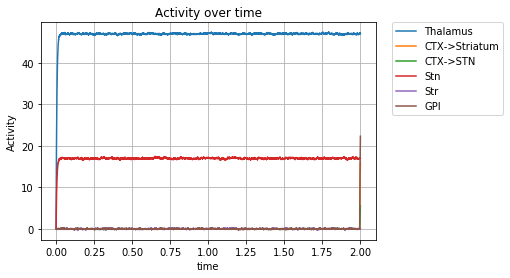

In [8]:
plt.plot(time_value,CtxTha_value,label='Thalamus')
plt.plot(time_value,StrCtx_value,label='CTX->Striatum')
plt.plot(time_value,StnCtx_value,label='CTX->STN')
plt.plot(time_value,GpiStn_value,label='Stn')
plt.plot(time_value,GpiStr_value,label='Str')
plt.plot(time_value,ThaGpi_value,label='GPI')

plt.title('Activity over time')
plt.ylabel('Activity')
plt.xlabel('time')
plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()